In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import pandas as pd
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

### Load CSV

In [3]:
dataFrame = pd.read_table(r"./Data/FDAXM22-EUREX_5Min.csv", sep = ";", engine = 'python')

In [4]:
dataFrame_morning = pd.read_table("Data/dataIB.csv", sep = ";", engine = 'python')

In [5]:
dataFrame_daily = pd.read_table(r"./Data/DailyData_VolumeProfile.csv", sep = ";", engine = 'python')

In [6]:
days = list(dataFrame_daily.Date)

In [7]:
dataFrame_norm = pd.read_table("Data/dataNormalisee5Min.csv", sep = ";", engine = 'python')

In [8]:
dataFrame_norm_daily = pd.read_table("Data/dataNormalisee.csv", sep = ";", engine = 'python')

In [9]:
dataFrame_norm_IB = pd.read_table("Data/dataIBNormalisee.csv", sep = ";", engine = 'python')

## Initial Balance

In [45]:
def correspondances_opening_day_spread(dataF, dataFMorning, tolerance):
    jours_max_correspondants = []
    jours_min_correspondants = []
    
    for day in days:
        dataFrame_day = dataF.loc[dataF.Date == day]
        dataFrame_morning_this_day = dataFMorning.loc[dataFMorning.Date == day]
        
        if len(dataFrame_day) > 0 and len(dataFrame_morning_this_day) > 0:
            if abs(float(dataFrame_day.High) - float(dataFrame_morning_this_day['High'])) <= tolerance:
                jours_max_correspondants.append(day)
                
            if abs(float(dataFrame_day.Low) - float(dataFrame_morning_this_day['Low'])) <= tolerance:
                jours_min_correspondants.append(day)
                
    return jours_max_correspondants, jours_min_correspondants

In [46]:
def compter_jours_correspondance(dataF, dataFMorning, tolerance):
    jours_max, jours_min = correspondances_opening_day_spread(dataF, dataFMorning, tolerance)
    nb__correspondances = len(jours_max)
    for jour in jours_min:
        if not jour in jours_max:
            nb__correspondances += 1
    return nb__correspondances

In [47]:
tolerance = 15
nb = compter_jours_correspondance(dataFrame_daily, dataFrame_morning, tolerance)
pourcentage_corr = nb/len(days)
print("Pourcentage de correspondance pour " + str(tolerance) + " points de tolérance = " + str(round(100*pourcentage_corr,2)) + "%")

Pourcentage de correspondance pour 15 points de tolérance = 67.12%


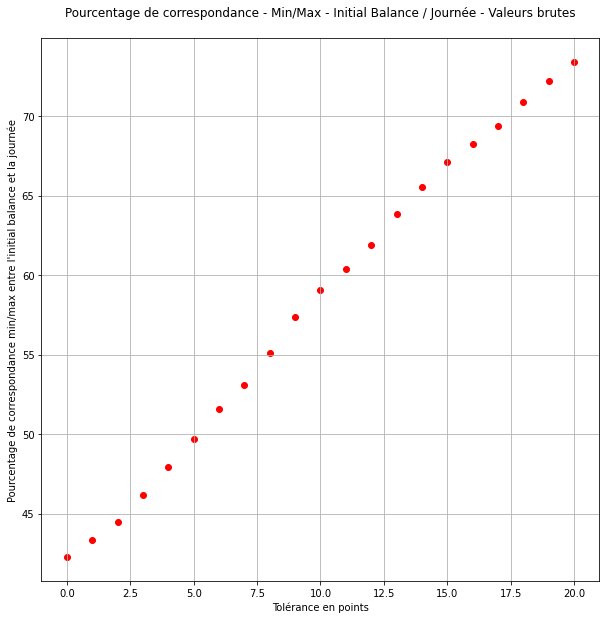

In [14]:
fig = plt.figure(figsize=(10,10))
for tolerance in range(21):
    nb_corr = compter_jours_correspondance(dataFrame_daily, dataFrame_morning, tolerance)
    pct_corr = nb_corr/len(days)
    plt.scatter(tolerance, round(100*pct_corr, 2), c='r')
    
plt.xlabel('Tolérance en points')
plt.ylabel('Pourcentage de correspondance min/max entre l\'initial balance et la journée')
plt.title('Pourcentage de correspondance - Min/Max - Initial Balance / Journée - Valeurs brutes\n')
plt.grid()
plt.show()

In [48]:
df_jour_semaine = []
df_jour_semaine.append(dataFrame_daily.loc[dataFrame_daily.Jour == 'Lundi'])
df_jour_semaine.append(dataFrame_daily.loc[dataFrame_daily.Jour == 'Mardi'])
df_jour_semaine.append(dataFrame_daily.loc[dataFrame_daily.Jour == 'Mercredi'])
df_jour_semaine.append(dataFrame_daily.loc[dataFrame_daily.Jour == 'Jeudi'])
df_jour_semaine.append(dataFrame_daily.loc[dataFrame_daily.Jour == 'Vendredi'])
df_jour_semaine.append(dataFrame_daily.loc[dataFrame_daily.Jour == 'Samedi'])
df_jour_semaine.append(dataFrame_daily.loc[dataFrame_daily.Jour == 'Dimanche'])

df_jour_semaine_matin = []
df_jour_semaine_matin.append(dataFrame_morning.loc[dataFrame_morning.Jour == 'Lundi'])
df_jour_semaine_matin.append(dataFrame_morning.loc[dataFrame_morning.Jour == 'Mardi'])
df_jour_semaine_matin.append(dataFrame_morning.loc[dataFrame_morning.Jour == 'Mercredi'])
df_jour_semaine_matin.append(dataFrame_morning.loc[dataFrame_morning.Jour == 'Jeudi'])
df_jour_semaine_matin.append(dataFrame_morning.loc[dataFrame_morning.Jour == 'Vendredi'])
df_jour_semaine_matin.append(dataFrame_morning.loc[dataFrame_morning.Jour == 'Samedi'])
df_jour_semaine_matin.append(dataFrame_morning.loc[dataFrame_morning.Jour == 'Dimanche'])

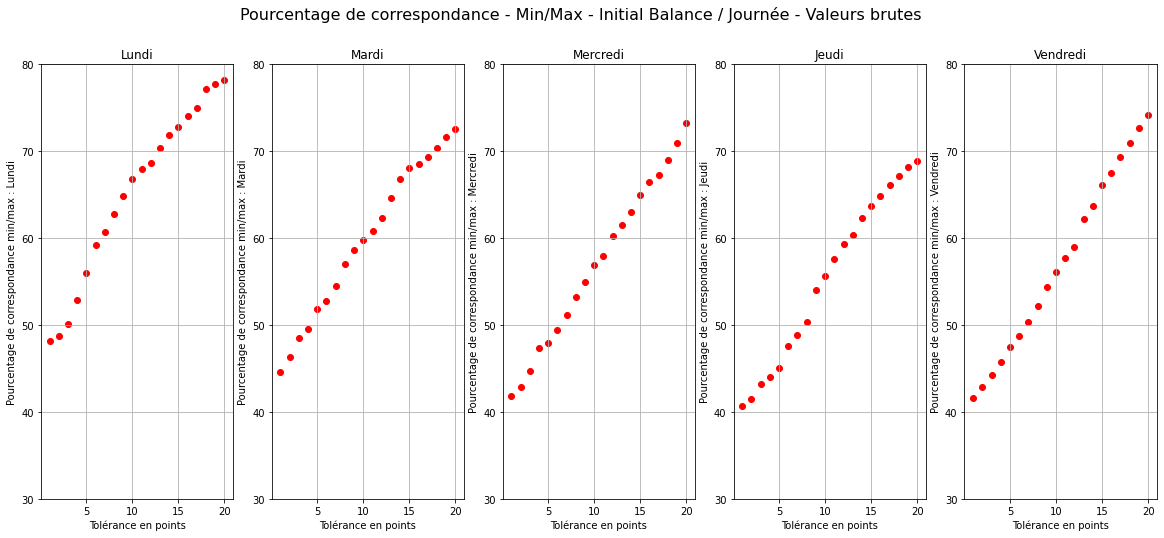

In [49]:
fig, axs = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Pourcentage de correspondance - Min/Max - Initial Balance / Journée - Valeurs brutes\n', fontsize=16)
for j in range(5):
    for tolerance in range(1, 21):
        nb_corr = compter_jours_correspondance(df_jour_semaine[j], df_jour_semaine_matin[j], tolerance)
        pct_corr = nb_corr/len(df_jour_semaine[j])
        axs[j].scatter(tolerance, round(100*pct_corr, 2), c='r')
            
    axs[j].grid()
    axs[j].set_ylim([30, 80])
    axs[j].set_xlabel('Tolérance en points')
    jour = str(df_jour_semaine[j].Jour.values[0])
    axs[j].set_title(jour)
    axs[j].set_ylabel("Pourcentage de correspondance min/max : " + jour)
plt.show()

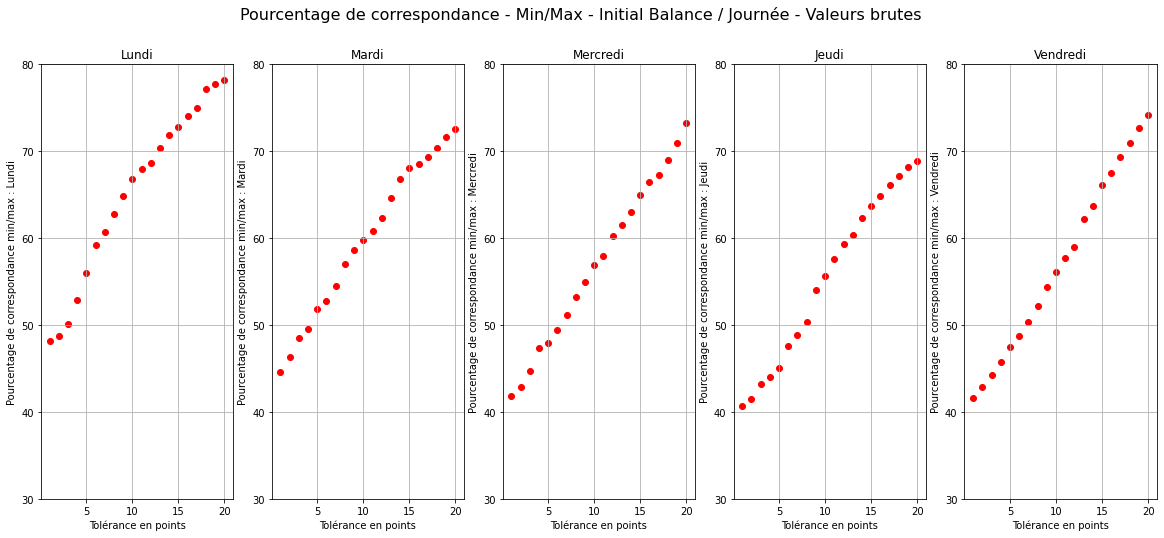

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Pourcentage de correspondance - Min/Max - Initial Balance / Journée - Valeurs brutes\n', fontsize=16)
for j in range(5):
    for tolerance in range(1, 21):
        nb_corr = compter_jours_correspondance(df_jour_semaine[j], df_jour_semaine_matin[j], tolerance)
        pct_corr = nb_corr/len(df_jour_semaine[j])
        axs[j].scatter(tolerance, round(100*pct_corr, 2), c='r')
            
    axs[j].grid()
    axs[j].set_ylim([30, 80])
    axs[j].set_xlabel('Tolérance en points')
    jour = str(df_jour_semaine[j].Jour.values[0])
    axs[j].set_title(jour)
    axs[j].set_ylabel("Pourcentage de correspondance min/max : " + jour)
plt.show()

## Même chose mais avec les valeurs normées

In [17]:
moyenne_DAX = np.mean(list(dataFrame_daily.Last))

In [20]:
tolerance = 15/moyenne_DAX;
nb = compter_jours_correspondance(dataFrame_norm_daily, dataFrame_norm_IB, tolerance)
pourcentage_corr = nb/len(days)
print("Pourcentage de correspondance pour " + str(round(tolerance, 6)) + " points de tolérance = " + str(round(100*pourcentage_corr,2)) + "%")

Pourcentage de correspondance pour 0.001299 points de tolérance = 58.42%


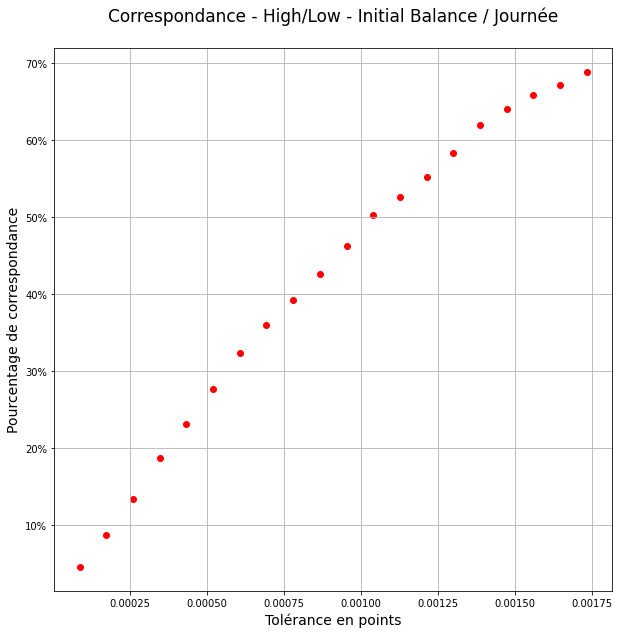

In [25]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(10,10))
for tolerance in range(21):
    nb_corr = compter_jours_correspondance(dataFrame_norm_daily, dataFrame_norm_IB, tolerance/moyenne_DAX)
    pct_corr = nb_corr/len(days)
    plt.scatter(tolerance/moyenne_DAX, round(100*pct_corr, 2), c='r')
    
plt.xlabel('Tolérance en points', fontsize=14)
plt.ylabel('Pourcentage de correspondance', fontsize=14)
plt.title('Correspondance - High/Low - Initial Balance / Journée\n', fontsize=17)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.grid()
plt.show()

In [41]:
df_jour_semaine = []
df_jour_semaine.append(dataFrame_norm_daily.loc[dataFrame_norm_daily.Jour == 'Lundi'])
df_jour_semaine.append(dataFrame_norm_daily.loc[dataFrame_norm_daily.Jour == 'Mardi'])
df_jour_semaine.append(dataFrame_norm_daily.loc[dataFrame_norm_daily.Jour == 'Mercredi'])
df_jour_semaine.append(dataFrame_norm_daily.loc[dataFrame_norm_daily.Jour == 'Jeudi'])
df_jour_semaine.append(dataFrame_norm_daily.loc[dataFrame_norm_daily.Jour == 'Vendredi'])
df_jour_semaine.append(dataFrame_norm_daily.loc[dataFrame_norm_daily.Jour == 'Samedi'])
df_jour_semaine.append(dataFrame_norm_daily.loc[dataFrame_norm_daily.Jour == 'Dimanche'])

df_jour_semaine_matin = []
df_jour_semaine_matin.append(dataFrame_norm_IB.loc[dataFrame_norm_IB.Jour == 'Lundi'])
df_jour_semaine_matin.append(dataFrame_norm_IB.loc[dataFrame_norm_IB.Jour == 'Mardi'])
df_jour_semaine_matin.append(dataFrame_norm_IB.loc[dataFrame_norm_IB.Jour == 'Mercredi'])
df_jour_semaine_matin.append(dataFrame_norm_IB.loc[dataFrame_norm_IB.Jour == 'Jeudi'])
df_jour_semaine_matin.append(dataFrame_norm_IB.loc[dataFrame_norm_IB.Jour == 'Vendredi'])
df_jour_semaine_matin.append(dataFrame_norm_IB.loc[dataFrame_norm_IB.Jour == 'Samedi'])
df_jour_semaine_matin.append(dataFrame_norm_IB.loc[dataFrame_norm_IB.Jour == 'Dimanche'])

In [42]:
df_jour_semaine[0]

,Date,Time,Jour,Open,High,Low,Last,Volume,# of Trades,OHLC Avg,...,VAL,VA_Spread,VA_EtatSpread,DailyHighToIBH,IBLToDailyLow,DailyHighToIBHNormalized,IBLToDailyLowNormalized,etatBarCloseToDailyCurrentVA',etatBarPOCToBar',IB_Sread_N
0,14/01/2013,08:00:00.0,Lundi,1.002623,1.008537,0.997480,1.001594,99267,42874,7797,...,7767,46,1,41,"30,5","0,53","0,39",2,0,"0,179717587"
5,21/01/2013,08:00:00.0,Lundi,1.000515,1.005403,1.000129,1.003988,36355,16282,7792,...,7777,21,-1,34,0,"0,44",0,2,0,"0,089697591"
10,28/01/2013,08:00:00.0,Lundi,1.019134,1.019777,1.012713,1.013869,77770,35145,7915,...,7895,22,-1,0,25,0,"0,32",2,0,"0,379987334"
15,04/02/2013,08:00:00.0,Lundi,1.009630,1.010655,0.980304,0.984274,151773,67059,7779,...,7656,168,2,"5,5",222,"0,07","2,89",2,0,"0,117096019"
20,11/02/2013,08:00:00.0,Lundi,0.990174,0.993258,0.982851,0.987091,82400,39027,7693,...,7680,38,0,"22,5",36,"0,29","0,47",2,0,"0,299362228"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,21/02/2022,08:00:00.0,Lundi,0.968515,0.973934,0.920128,0.925738,90328,80502,14856,...,14646,432,2,0,756,0,"5,21",2,0,"0,606018869"
2236,28/02/2022,08:00:00.0,Lundi,0.901431,0.930310,0.901240,0.915296,91385,83872,14276,...,14224,153,0,229,0,"1,6",0,2,0,"1,577551305"
2241,07/03/2022,08:00:00.0,Lundi,0.820980,0.846253,0.800262,0.814373,111917,99382,12791,...,12514,417,2,364,86,"2,87","0,68",2,0,"2,103024575"
2246,14/03/2022,08:00:00.0,Lundi,0.896203,0.911295,0.892914,0.898396,58974,53252,13950,...,13868,164,-2,171,0,"1,23",0,2,0,"0,818377602"


In [43]:
df_jour_semaine_matin[0]

,Date,Jour,Open,High,Low,Last,Volume,BidVolume,AskVolume,Spread,Delta,CumulativeDelta,MoyennneMobile
0,14/01/2013,Lundi,1.001799,1.002441,1.000642,1.001285,4075.0,1685.0,2390.0,14.0,705.0,-371.0,7795.666667
5,21/01/2013,Lundi,1.000450,1.002894,1.000064,1.002251,3066.0,1483.0,1583.0,22.0,100.0,-530.0,7783.785714
10,28/01/2013,Lundi,1.020812,1.021456,1.017468,1.017725,5768.0,2508.0,3260.0,31.0,752.0,-1899.0,7788.000000
15,04/02/2013,Lundi,1.010517,1.010773,1.009363,1.009491,3953.0,2152.0,1801.0,11.0,-351.0,-714.0,7805.608696
20,11/02/2013,Lundi,0.990042,0.990299,0.986445,0.986959,5227.0,2484.0,2743.0,30.0,259.0,-1536.0,7780.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,21/02/2022,Lundi,0.968714,0.974134,0.968522,0.970435,6026.0,3046.0,2980.0,88.0,-66.0,73864.0,15439.130435
2236,28/02/2022,Lundi,0.901621,0.916063,0.901429,0.915808,10751.0,5302.0,5449.0,229.0,147.0,74474.0,15184.913043
2241,07/03/2022,Lundi,0.820767,0.822691,0.805569,0.812110,11656.0,5701.0,5955.0,267.0,254.0,74858.0,14789.956522
2246,14/03/2022,Lundi,0.896188,0.900252,0.892899,0.895479,5410.0,2731.0,2679.0,114.0,-52.0,75554.0,14362.695652


0
1
2
3
4


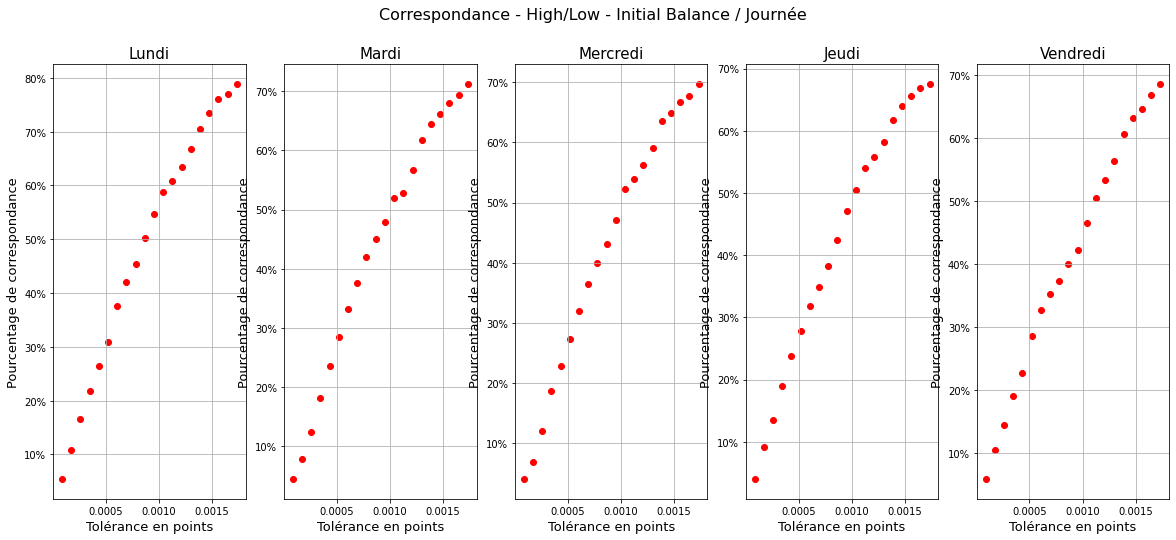

In [44]:
fig, axs = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Correspondance - High/Low - Initial Balance / Journée\n', fontsize=16)

for j in range(5):
    print(j)
    for tolerance in range(1, 21):
        nb_corr = compter_jours_correspondance(df_jour_semaine[j], df_jour_semaine_matin[j], tolerance/moyenne_DAX)
        pct_corr = nb_corr/len(df_jour_semaine[j])
        #print(f"tolerance -> {tolerance}, pcr_corr -> {pct_corr}")
        axs[j].scatter(tolerance/moyenne_DAX, round(100*pct_corr, 2), c='r')
    
    #axs[j] = plt.gca()        
    axs[j].grid()
    #axs[j].set_ylim([0, 85])
    axs[j].set_xlabel('Tolérance en points', fontsize=13)
    jour = str(df_jour_semaine[j].Jour.values[0])
    axs[j].set_title(jour, fontsize=15)
    axs[j].set_ylabel('Pourcentage de correspondance', fontsize=13)
    axs[j].yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

### Spread / Initial balance

In [53]:
df_spread_IB = dataFrame_morning.copy(deep=True)
spread_IB = list(df_spread_IB.Spread)

spread_day = list(dataFrame_daily.spread)
#spread_day = [float(k.replace(",", ".")) for k in spread_day]

In [54]:
spread_IB_norm = list(dataFrame_norm_IB.Spread)
 
spread_day_norm = list(dataFrame_norm_daily.spread)

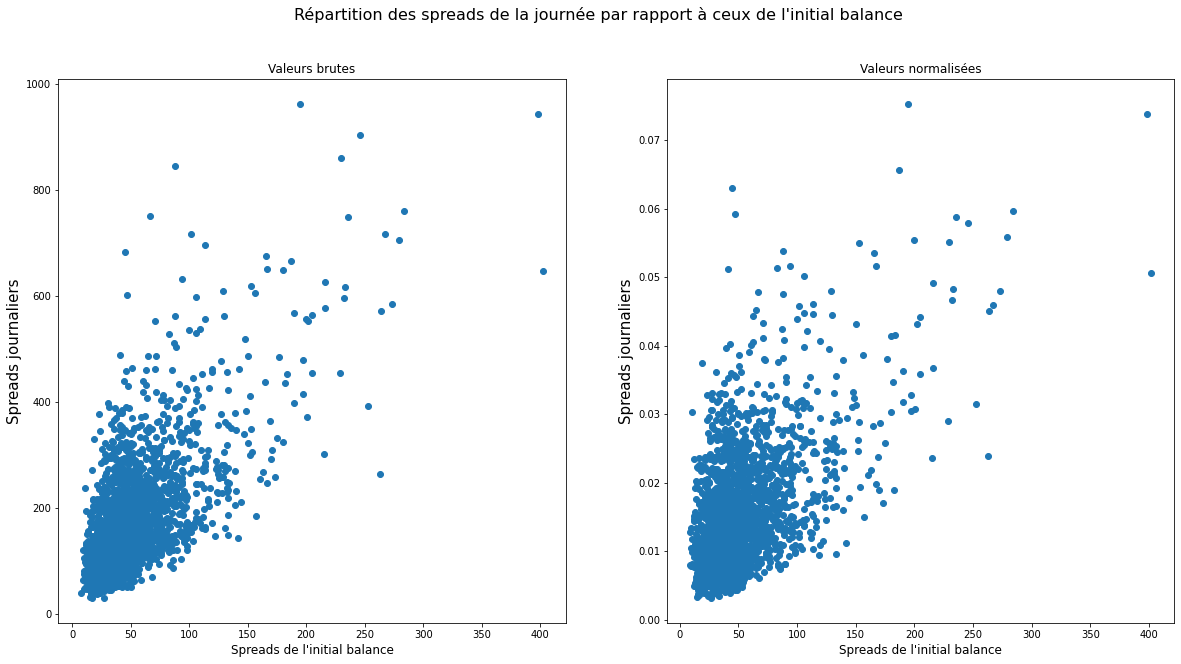

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Répartition des spreads de la journée par rapport à ceux de l\'initial balance\n', fontsize=16)

axs[0].scatter(spread_IB, spread_day)
axs[0].set_title('Valeurs brutes')
axs[0].set_xlabel('Spreads de l\'initial balance', fontsize = 12)
axs[0].set_ylabel('Spreads journaliers', fontsize = 15)

axs[1].scatter(spread_IB_norm, spread_day_norm)
axs[1].set_title('Valeurs normalisées')
axs[1].set_xlabel('Spreads de l\'initial balance', fontsize = 12)
axs[1].set_ylabel('Spreads journaliers', fontsize = 15)

plt.show()

In [57]:
def pew(spread_IB, spread_day, classe):
    nb = [0, 0, 0, 0, 0] 
    for i in range(len(spread_IB)):
        if spread_IB[i] == classe:
            nb[spread_day[i]+2] += 1
    return nb

In [58]:
def correlation_spread_Zscore(df, classe):
    nb = [0, 0, 0, 0, 0]
    classeSpreadIB = df['IB_EtatSpread']
    classeSpreadDay = df["etat variable 'spread'"]
    for i in range(len(classeSpreadIB)):
        if classeSpreadIB[i] == classe:
            nb[classeSpreadDay[i]+2] += 1
    return nb

In [59]:
def histogrammes_correspondances_spreads(df, titre):
    correlations = [correlation_spread_Zscore(df, k-2) for k in range(5)]
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    fig.suptitle('Histogrammes - Valeurs ' + titre +'\n', fontsize=16)
        
    for j in range(2):
        for i in range(5):
            axs[j].plot([i+1, i+1], [0, correlations[j][i]], linewidth=20, c = 'black')

        axs[j].set_title('Histogramme des classes de Spread journalières - Classe ' + str(j-2) +' de Spread Initial Balance')
        axs[j].set_xlabel('Classe de spread journaliers')
        axs[j].set_ylabel('Nombre de spreads')
        axs[j].set_ylim([0, 850])
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    for j in range(2):
        for i in range(5):
            axs[j].plot([i+1, i+1], [0, correlations[j+2][i]], linewidth=20, c = 'black')

        axs[j].set_title('Histogramme des classes de Spread journalières - Classe ' + str(j+3) +' de Spread Initial Balance')
        axs[j].set_xlabel('Classe de spread journaliers')
        axs[j].set_ylabel('Nombre de spreads')
        axs[j].set_ylim([0, 850])
    plt.show()

    fig = plt.figure(figsize=(8,5))
    for i in range(5):
        plt.plot([i+1, i+1], [0, correlations[4][i]], linewidth=20, c = 'black')

    plt.title('Histogramme des classes de Spread journalières - Classe ' + str(5) +' de Spread Initial Balance')
    plt.xlabel('Classe de spread journaliers')
    plt.ylabel('Nombre de spreads')
    plt.ylim([0, 850])
    plt.show()

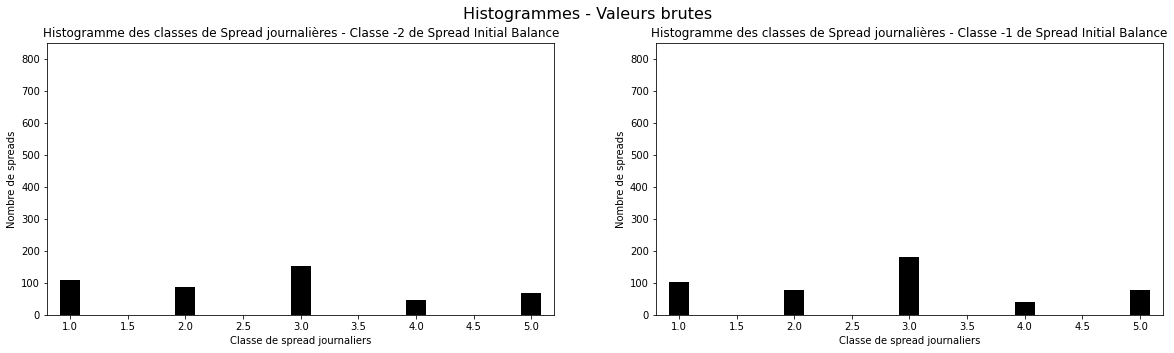

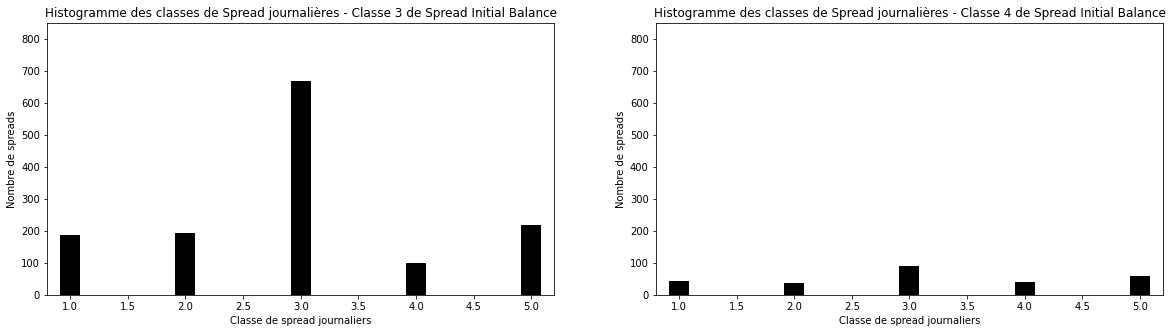

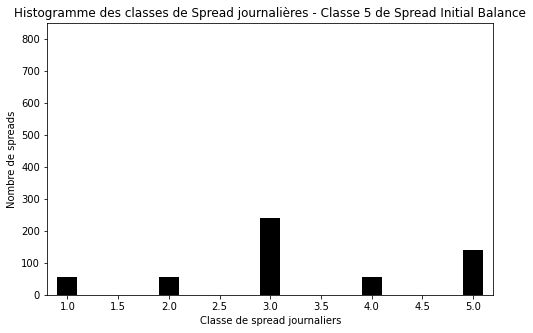

In [60]:
histogrammes_correspondances_spreads(dataFrame_daily, "brutes")

In [61]:
correlations = [correlation_spread_Zscore(dataFrame_daily, k-2) for k in range(5)]
for i in range(5):
    sum_ = sum(correlations[i])
    for j in range(5):
        correlations[i][j] /= sum_
        correlations[i][j] *= 100

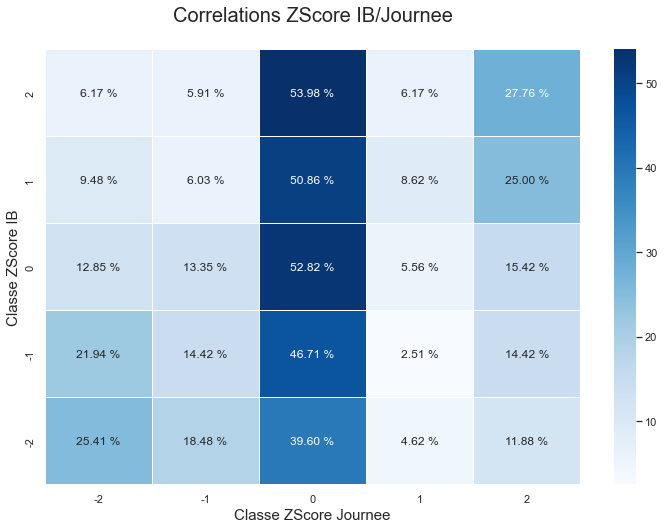

In [62]:
import seaborn as sns; sns.set_theme()
axis_labels = [-2, -1, 0, 1, 2]
plt.figure(figsize=(12,8))
ax = sns.heatmap(correlations, annot=True, fmt=".2f", linewidth=1, cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
ax.invert_yaxis()
for t in ax.texts: t.set_text(t.get_text() + " %")

plt.title('Correlations ZScore IB/Journee\n', fontsize = 20) # title with fontsize 20
plt.ylabel('Classe ZScore IB', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Classe ZScore Journee', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [30]:
c = [correlation_spread_Zscore(dataFrame_daily, k-2) for k in range(5)]

correlations_deux_classes = [[0, 0], [0, 0]]
correlations_deux_classes[0][0] += c[0][0] + c[0][1] + c[1][0] + c[1][1]
correlations_deux_classes[0][1] += c[0][2] + c[0][3] + c[0][4] + c[1][2] + c[1][3] + c[1][4]
correlations_deux_classes[1][0] += c[2][0] + c[2][1] + c[3][0] + c[3][1] + c[4][0] + c[4][1]
correlations_deux_classes[1][1] += c[2][2] + c[2][3] + c[2][4] + c[3][2] + c[3][3] + c[3][4] + c[4][2] + c[4][3] + c[4][4]

In [31]:
for i in range(2):
    sum_ = sum(correlations_deux_classes[i])
    for j in range(2):
        correlations_deux_classes[i][j] /= sum_
        correlations_deux_classes[i][j] *= 100

In [32]:
correlations_deux_classes

[[40.2555910543131, 59.7444089456869], [22.2676797194623, 77.73232028053769]]

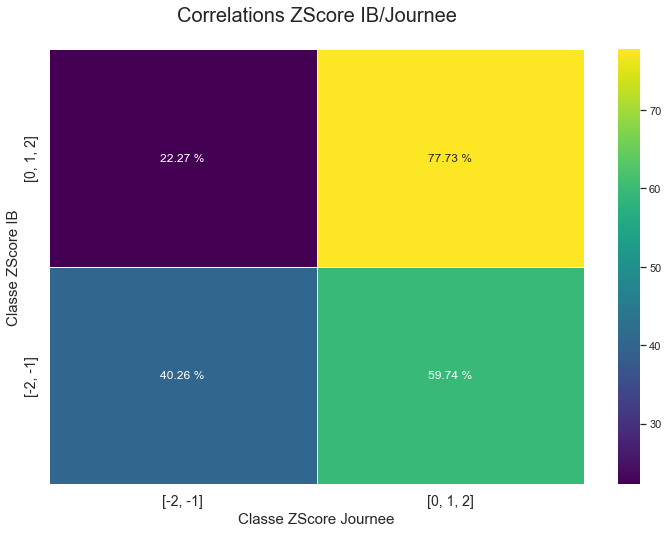

In [33]:
import seaborn as sns; sns.set_theme()
axis_labels = [[-2, -1], [0, 1, 2]]
plt.figure(figsize=(12,8))
ax = sns.heatmap(correlations_deux_classes, annot=True, fmt=".2f", linewidth=1, cmap='viridis')
ax.invert_yaxis()
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.set_xticklabels(axis_labels, fontsize = 14)
ax.set_yticklabels(axis_labels, fontsize = 14)

plt.title('Correlations ZScore IB/Journee\n', fontsize = 20) # title with fontsize 20
plt.ylabel('Classe ZScore IB', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Classe ZScore Journee', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [52]:
c = [correlation_spread_Zscore(dataFrame_daily, k-2) for k in range(5)]

correlations_2_day = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
for i in range(5):
    correlations_2_day[i][0] = c[i][0] + c[i][1]
    correlations_2_day[i][1] = c[i][2] + c[i][3] + c[i][4]

In [53]:
correlations_2_day

[[136, 171], [116, 203], [316, 890], [18, 98], [47, 342]]

In [54]:
for i in range(5):
    sum_ = np.sum(correlations_2_day[i])
    for j in range(2):
        correlations_2_day[i][j] /= sum_
        correlations_2_day[i][j] *= 100

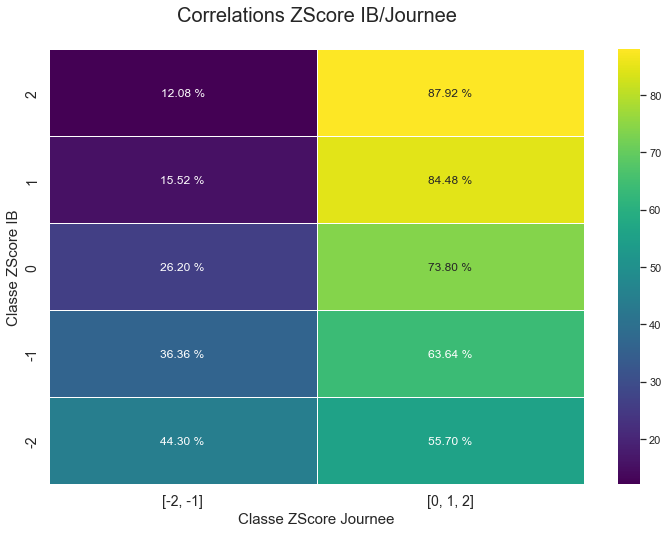

In [55]:
import seaborn as sns; sns.set_theme()
x_axis_labels = [[-2, -1], [0, 1, 2]]
y_axis_labels = [-2, -1, 0, 1, 2]
plt.figure(figsize=(12,8))
ax = sns.heatmap(correlations_2_day, annot=True, fmt=".2f", linewidth=1, cmap='viridis')
ax.invert_yaxis()
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.set_xticklabels(x_axis_labels, fontsize = 14)
ax.set_yticklabels(y_axis_labels, fontsize = 14)

plt.title('Correlations ZScore IB/Journee\n', fontsize = 20) # title with fontsize 20
plt.ylabel('Classe ZScore IB', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Classe ZScore Journee', fontsize = 15) # y-axis label with fontsize 15
plt.show()

## Comparaison Spread Initial Balance avec différents indices

In [80]:
df_spread_IB = dataFrame_morning.copy(deep=True)
spread_IB = list(df_spread_IB.Spread)

spread_day = list(dataFrame_daily.Spread)

In [81]:
# Comparaison Spreads avec un indice du jour précédent 

def comparaison_taille_IB_previous_day(indice):
    spread_IB = list(df_spread_IB.Spread)
    spread_day = list(dataFrame_daily.Spread)
    result_X = []
    result_Y_IB = []
    result_Y_day = []
    for i in range(1,len(spread_IB)):
        result_X.append(indice[i-1])
        result_Y_IB.append(spread_IB[i])
        result_Y_day.append(spread_day[i])
    return result_X, result_Y_IB, result_Y_day
    

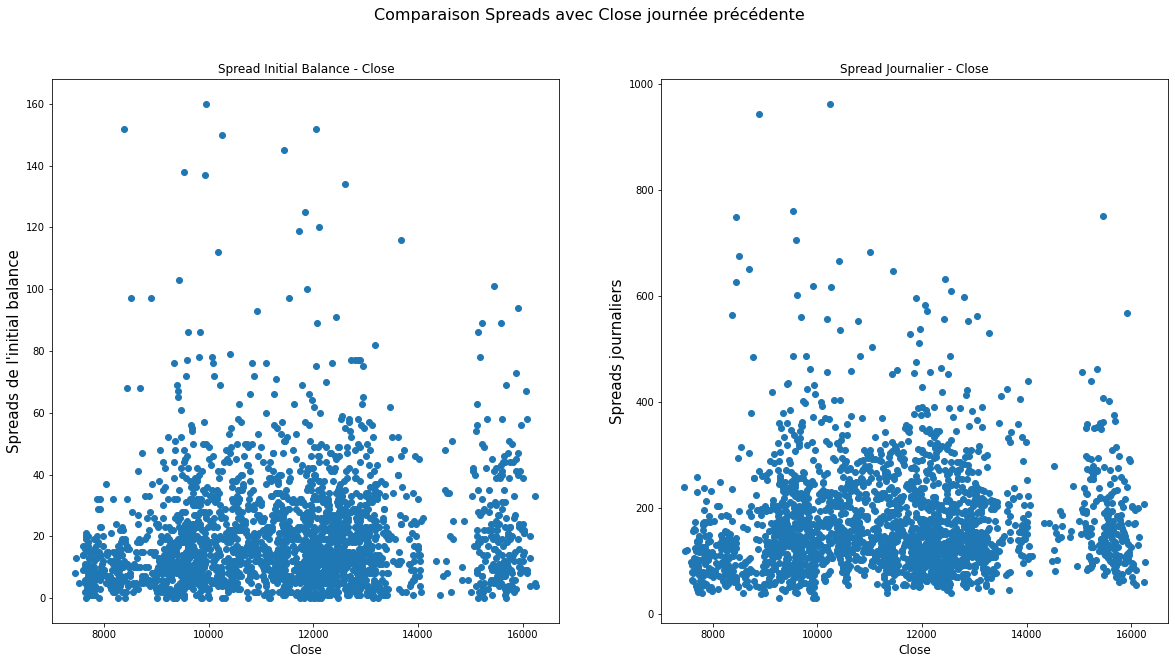

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Comparaison Spreads avec Close journée précédente \n', fontsize=16)

indice = list(dataFrame_daily['Close'])
X,Y_IB,Y_day = comparaison_taille_IB_previous_day(indice)

axs[0].scatter(X, Y_IB)
axs[0].set_title('Spread Initial Balance - Close')
axs[0].set_xlabel('Close', fontsize = 12)
axs[0].set_ylabel('Spreads de l\'initial balance', fontsize = 15)

axs[1].scatter(X, Y_day)
axs[1].set_title('Spread Journalier - Close')
axs[1].set_xlabel('Close', fontsize = 12)
axs[1].set_ylabel('Spreads journaliers', fontsize = 15)
plt.show()